In [2]:
import os
import pandas as pd
import numpy as np
import re
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Feature extraction

In [ ]:
features = load('../features/tfidf/features_train.joblib')
labels = load('../features/tfidf/labels_train.joblib')
features.shape

# Training

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [5]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    MultinomialNB(),
    LogisticRegression(random_state=42),
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.965783,0.050755
LogisticRegression,0.963175,0.047873
MultinomialNB,0.902356,0.036848
RandomForestClassifier,0.460987,0.016150


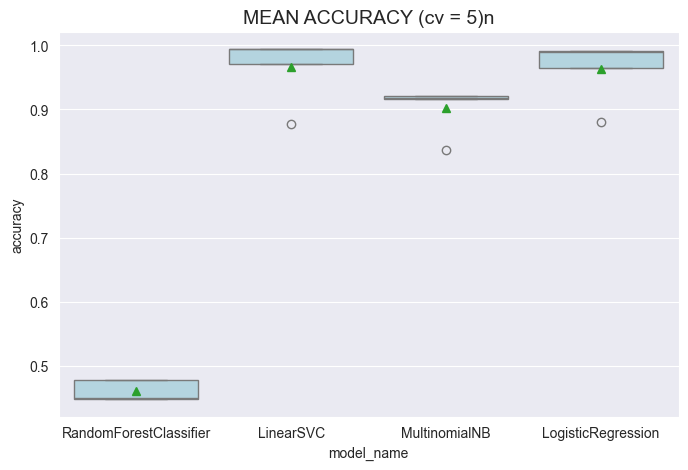

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.25,random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred))

ttttCLASSIFICATIION METRICSn
                   precision    recall  f1-score   support

   ethnicity/race       0.99      0.98      0.98      6171
    gender/sexual       0.98      0.93      0.96      6133
not_cyberbullying       0.96      0.99      0.97     14713
         religion       0.99      0.97      0.98      5950

         accuracy                           0.97     32967
        macro avg       0.98      0.97      0.97     32967
     weighted avg       0.97      0.97      0.97     32967



In [ ]:
predict_features = load('features/tfidf1/features_predict.joblib')
df_predict = pd.read_csv("../BullyingPredict.csv")

In [ ]:
predictions = model.predict(predict_features)

In [20]:
random_indices = np.random.choice(len(predictions), size=10, replace=False)
sample_predictions = pd.DataFrame({
    'Index': random_indices,
    'Prediction': predictions[random_indices]
})
display(sample_predictions)


,Index,Prediction
0,9881,not_cyberbullying
1,8913,not_cyberbullying
2,8989,not_cyberbullying
3,7635,not_cyberbullying
4,7641,not_cyberbullying
5,15691,not_cyberbullying
6,12339,not_cyberbullying
7,3567,not_cyberbullying
8,7611,not_cyberbullying
9,10186,not_cyberbullying


In [21]:
df_predict.iloc[sample_predictions['Index']]

,text
9881,2 sides to every story what drove this young m...
8913,those were the girls at my high school who bul...
8989,me i wish i was cool genie ok me and popular g...
7635,everyone see he just called me a punk hes a bu...
7641,wtf is blameonenotall
15691,always the whiny little victim you re like the...
12339,this is like middle school bully behavior
3567,booooooooo you bunch of fucking crooks
7611,if there were 2 lesbians there would be no gam...
10186,my middle school bullies seeing me in the hallway
